In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("allPlayers.csv")

In [27]:
players_dict = {}
baseListDf = []
for i, row in df.iterrows():

    current = row["sofifa_id"]
    if current in players_dict:
        new_value = players_dict[current]
        new_value.append([len(new_value),row["value_eur"]])
        players_dict[current] = new_value
        baseListDf.append(False)

        # players_dict[current] = players_dict[current]
    else:
        players_dict[current] = [[0,row["value_eur"]]]
        baseListDf.append(True)

# print(players_dict)
df = df[baseListDf]
# df.to_csv("source_o.csv", index=False)

In [28]:
from sklearn.linear_model import LinearRegression
players_slopes_array = []
for arr in players_dict.values():
    x=np.array([v[0] for v in arr]).reshape((-1, 1))
    y=[v[1] for v in arr]
    reg = LinearRegression().fit(x,y)
    players_slopes_array.append(reg.coef_[0])

targetDf= pd.DataFrame(players_slopes_array)
targetDf= targetDf.rename(columns={"0": "Target"})
targetDf.to_csv("target_market_value.csv", index=False)



C:\Users\omerk\OneDrive - Y-Con B.V\Google\Thesis\data\archive\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


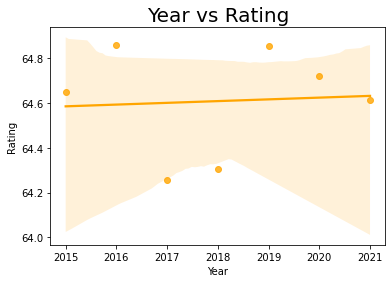

In [10]:
df = df.sort_values(["short_name", "age"])
counter = 0
full_arr = []
temp = []
for i, r in df.iterrows():
    temp.append(r["overall"])
    counter += 1
    if counter > 0 and counter % 7 == 0:
        full_arr.append(temp)
        temp = []

avg_2015 = 0
avg_2016 = 0
avg_2017 = 0
avg_2018 = 0
avg_2019 = 0
avg_2020 = 0
avg_2021 = 0
for r in full_arr:
    avg_2015 += r[0]
    avg_2016 += r[1]
    avg_2017 += r[2]
    avg_2018 += r[3]
    avg_2019 += r[4]
    avg_2020 += r[5]
    avg_2021 += r[6]
avg_2015 = avg_2015 / len(full_arr)
avg_2016 = avg_2016 / len(full_arr)
avg_2017 = avg_2017 / len(full_arr)
avg_2018 = avg_2018 / len(full_arr)
avg_2019 = avg_2019 / len(full_arr)
avg_2020 = avg_2020 / len(full_arr)
avg_2021 = avg_2021 / len(full_arr)

x = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
y = [
    avg_2015,
    avg_2016,
    avg_2017,
    avg_2018,
    avg_2019,
    avg_2020,
    avg_2021,
]
sns.regplot(x, y, color='orange')
plt.title('Year vs Rating', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()